In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sys import stdout
from openpyxl import Workbook

In [138]:
#Registro de variables fijas
n = 0.9



Bienvenido a Leopard, por favor ingrese las caracteristicas a los pozos asociados 
      


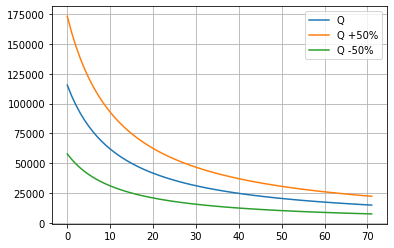

In [139]:
print("""
Bienvenido a Leopard, por favor ingrese las caracteristicas a los pozos asociados 
      """)
# sw = float(input("Ingrese el valor de la saturacion de agua"))
# toc = float(input("Ingrese el valor promedio del porcentaje del TOC"))
# den = float(input("Ingrese el valor de la densidad"))
qi =  126000 #int(input('Ingrese la tasa de produccion mas alta: '))
qa = 14811 #int(input('Ingrese el valor de tasa de producción de abanandono: '))
t = 72 #int(input('Ingrese tiempo de abandono: '))

#Calculo D
D = ( 1 / ( n * t ) ) * ( ( ( qi / qa ) ** n ) -1 )
t_prod = [i for i in range (t + 1)]

#Creacion de las listas de tiempo y produccion
q = []
for t_index in range (1,t+1):
      prod = qi * ( 1 + ( n * D * t_index )) ** (-1 / n )
      q.append(prod)

#Creacion del dataframe curve y la curva de produccion +-50%
curve = pd.DataFrame()
curve['Q'] = q
curve['Q +50%'] = curve['Q'] * 1.5
curve['Q -50%'] = curve['Q'] *0.5
curve.plot()
plt.grid()
q.insert(0,0)

curve.to_excel('curva_de_Produccion.xlsx',sheet_name="economia",)



In [140]:

#Calculos economicos en funcion de la produccion 
price_barrel = 68 #float ( input("Ingrese el precio del barril en dolares: "))
oportu_rate = 12 #float( input("Ingrese el porcentaje de tasa de oportunidad")) / 100
oportu_rate = ((1 + oportu_rate) ** (1/12))-1
ft = 10035 #float( input(" Ingrese la profundidad de la zona de interes mostrada de funetes externas o de Cougar")) + 3500
drill_well_cost = 2000000
completion_cost = 850 * ft
capex = drill_well_cost + completion_cost
economy = pd.DataFrame()

royalties = 0.08 * price_barrel
taxes = 0.34 * price_barrel
quality_penalty = 0.05 * price_barrel
transport_price = 2
administrative_cost = 2
prod_cost_only = royalties + taxes + quality_penalty + transport_price + administrative_cost

economy['tiempo (meses)'] = [i for i in range (1,t + 1)]
economy['Ingresos'] = curve['Q'] * price_barrel
economy['Egresos'] = curve['Q'] * prod_cost_only

economy['Flujo de efectivo'] = economy['Ingresos'] - economy['Egresos']
economy['Valor presente'] = economy['Flujo de efectivo'] /  (( 1 + oportu_rate ) ** economy['tiempo (meses)'] )

capex_data = {
    'Ingresos': 0 ,
    'Egresos': capex,
    'Valor presente': - capex
}
economy = economy.append(capex_data, ignore_index=True)

economy['Flujo de efectivo'] = economy['Ingresos'] - economy['Egresos']


# economy.to_excel('Economia.xlsx',sheet_name="economia",)

economy


,tiempo (meses),Ingresos,Egresos,Flujo de efectivo,Valor presente
0,1.0,7.853702e+06,4.153223e+06,3.700480e+06,2.988336e+06
1,2.0,7.244647e+06,3.831140e+06,3.413507e+06,2.226095e+06
2,3.0,6.719476e+06,3.553417e+06,3.166059e+06,1.667374e+06
3,4.0,6.262205e+06,3.311601e+06,2.950603e+06,1.254863e+06
4,5.0,5.860644e+06,3.099246e+06,2.761398e+06,9.483876e+05
...,...,...,...,...,...
68,69.0,1.048540e+06,5.544927e+05,4.940475e+05,1.943544e-01
69,70.0,1.034389e+06,5.470091e+05,4.873796e+05,1.548333e-01
70,71.0,1.020596e+06,5.397150e+05,4.808807e+05,1.233689e-01
71,72.0,1.007148e+06,5.326036e+05,4.745444e+05,9.831432e-02


In [141]:
# Exportar a excel
production.to_excel('Registro.xlsx',sheet_name="Registro_1_Limpio",)

# Impresion de la gráfica y vista del archivo pandas
plt.show()
print(df)

NameError: name 'production' is not defined